Implementation of the Welsh-Powell Algorithm

Sources:

Watson, Gordon. “Comparing the Efficiency of Welsh-Powell Algorithm and Basic Greedy Algorithm for Graph Coloring - Graph Theory.” CopyProgramming, 15 May 2023, copyprogramming.com/howto/why-is-welsh-powell-algorithm-better-than-the-basic-greedy-algorithm-for-graph-coloring.

“Welsh Powell Graph Colouring Algorithm.” GeeksforGeeks, GeeksforGeeks, 29 Oct. 2019, www.geeksforgeeks.org/welsh-powell-graph-colouring-algorithm/.

“Vertex Coloring: The Welsh Powell Algorithm.” Kleemans.Ch, www.kleemans.ch/static/fourcolors/welsh-powell.pdf. Accessed 16 Oct. 2023.

“Graph Coloring Using Greedy Algorithm.” GeeksforGeeks, GeeksforGeeks, 10 Oct. 2023, www.geeksforgeeks.org/graph-coloring-set-2-greedy-algorithm/?ref=ml_lbp\%27.

The Welsh Powell Algorithm is a type of greedy algorithm that is used for determining the fewest number of colors that can be used to color the vertices of a graph so there will be no two adjacent vertices sharing a color. What differentiates this algorithm from a typical greedy algorithm, is that the Welsh Powell Algorithm sorts all of the vertices by descending degree before beginning to assign them colors. This approach helps to get the vertices with the highest degree taken care of early on, since the higher degree they are, the more likely they are to need a new color. 

Once the vertices are sorted by descending degree, the algorithm will go down the list of vertices. The first one that it gets to that doesn't already have a color assigned to it, will be assigned the color that vertices will be assigned that cycle. From there, any vertex that is not adjacent to any of the other vertices that were colored that round, will be colored the same color as the vertices in that cycle. This cycle of giving new colors to vertices that are already adjacent to previously assigned colors and are not adjacent to each other, continues until every vertex has been colored. 

After every vertex has been colored using the Welsh Powell algorithm, K, the smallest number of colors that could be used to color this graph so that no two adjacent vertices had the same color, will be found.

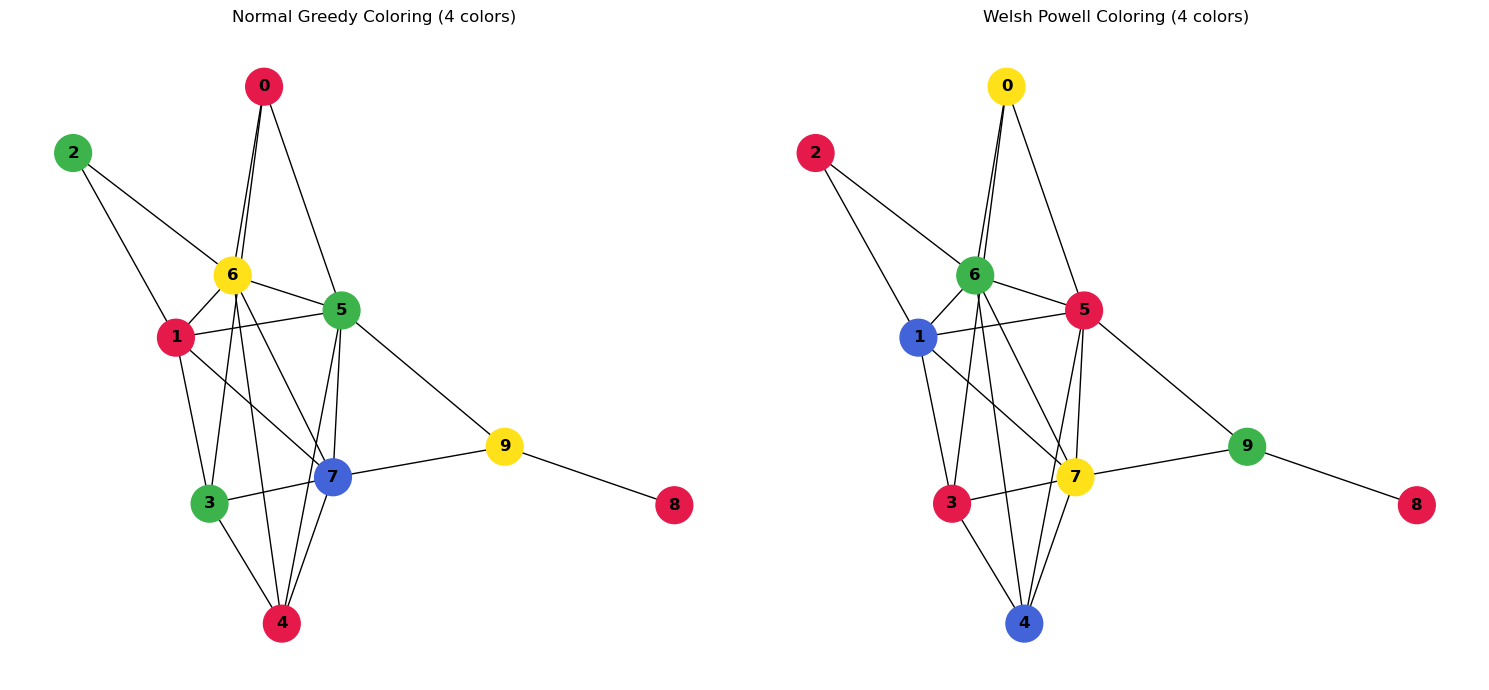

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def addEdge(edge_list, vertex_1, vertex_2):
    edge_list[vertex_1].append(vertex_2) #adds vertex_2 to vertex_1s adjacencies
    edge_list[vertex_2].append(vertex_1) #adds vertex_1 to vertex_2s adjacencies

    return edge_list #returns the entire edge list

def greedy(edge_list):
    """
    Color a graph using the Greedy Coloring algorithm.

    The Greedy Coloring algorithm assigns colors to vertices such that no two
    adjacent vertices share the same color. It starts with the first vertex
    and iteratively colors each subsequent vertex with the lowest available
    color.

    Args:
        edge_list (list): A list of lists representing the graph's edges.

    Returns:
        dict: A dictionary where keys are vertex indices and values are the
        assigned colors. Vertices are colored in a greedy manner, trying to use
        the lowest available color.
    """
    colors = [-1] * len(edge_list)  # Array to hold the colors for each vertex
    available_colors = [False] * len(edge_list)  # Array to hold which colors are available for that vertex
    
    colors[0] = 0  # Assign the first vertex to the first color
    max_color = 0  # Initialize max color to 0 since we've colored the first vertex with color 0

    for vertex in range(1, len(edge_list)):
        for adjacent_vertex in edge_list[vertex]:
            if colors[adjacent_vertex] != -1:  # If the adjacent vertex has a color
                available_colors[colors[adjacent_vertex]] = True  # Mark that color as unavailable
        
        lowest_color = 0
        while lowest_color < len(edge_list) and available_colors[lowest_color]:
            lowest_color += 1

        colors[vertex] = lowest_color  # Color the current vertex with the found lowest color
        if lowest_color > max_color:
            max_color = lowest_color  # Update max_color if necessary
        
        available_colors = [False] * len(edge_list)  # Reset available colors for the next loop

    color_dict = {str(vertex): color for vertex, color in enumerate(colors)}
    return color_dict


def find_color(node_index, edge_list, color_list):
    """
    Find the color that a selected node should be.

    Colors are represented by an int. A color that hasn't been assigned yet is represented as a -1.

    Args:
        node_index: an int of the index of the current node
        edge_list: a list of lists that represent all of the nodes that a node is attached too
        color_list: a list of all of the current colors represented by an int

    Returns:
        a list of lists that is a heap and contains the saturation value and index of each node
    """
    nodes_to_check = edge_list[node_index]
    taken_colors = [-1]
    for node in nodes_to_check:
        if color_list[node] not in taken_colors:
            taken_colors += [color_list[node]]
    for color in range(len(taken_colors)):
        if color not in taken_colors:
            return color
    return len(taken_colors) +1 


def welsh_powell(edge_list):
    """
    Color a graph using the Welsh-Powell algorithm.

    The Welsh-Powell algorithm colors the vertices of a graph such that no two
    adjacent vertices have the same color. It sorts the vertices based on their
    degrees in descending order and assigns colors accordingly.

    Args:
        edge_list: A list of lists representing the graph's edges.

    Returns:
        dict: A dictionary where keys are vertex indices and values are the
        assigned colors
    """
    # sort vertices
    indexed_dict = {index: sublist for index, sublist in enumerate(edge_list)}
    sorted_dict = dict(sorted(indexed_dict.items(), key=lambda item: len(item[1]), reverse=True))

    colors = [-1] * len(edge_list)  # Array to hold the colors for each vertex
    for key in sorted_dict:
        curr_index = key
        colors[curr_index] = find_color(curr_index, edge_list, colors)
    color_dict = {str(vertex): color for vertex, color in enumerate(colors)}
    return color_dict



def visualize_greedy_vs_welsh_powell(edge_list, greedy_coloring, welsh_powell_coloring):
    G = nx.Graph()
    edges_as_tuples = [(i, neighbor) for i, neighbors in enumerate(edge_list) for neighbor in neighbors]
    G.add_edges_from(edges_as_tuples)

    color_palette_50 = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',  # red, green, yellow, blue, orange
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',  # purple, cyan, magenta, lime, pink
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',  # teal, lavender, brown, beige, maroon
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',  # light green, olive, peach, navy, gray
    '#ffffff', '#000000', '#0a74da', '#6f2da8', '#008000',  # white, black, bright blue, indigo, dark green
    '#e0e0e0', '#d1e231', '#fabea7', '#ff7f00', '#ff0033',  # light gray, lime green, light peach, bright orange, bright red
    '#a1ca6d', '#673770', '#c1a1d3', '#d1e8e2', '#f9c1a2',  # olive green, dark purple, light purple, light cyan, light orange
    '#0d98ba', '#ffdb58', '#00468b', '#ff6fff', '#a4c639',  # turquoise, gold, dark blue, hot pink, green-yellow
    '#cd9575', '#665d1e', '#915c83', '#841b2d', '#faebd7'   # antique brass, golden brown, plum, ruby, antique white
    ]  

    max_colors = max(max(greedy_coloring.values()), max(welsh_powell_coloring.values())) + 1

    if len(color_palette_50) < max_colors:
        raise ValueError("The graph requires more colors than the provided color palette can offer.")
    
    greedy_node_colors = [color_palette_50[greedy_coloring.get(str(node), -1)] for node in G.nodes()]
    welsh_powell_nodes_coloring = [color_palette_50[welsh_powell_coloring.get(str(node), -1)] for node in G.nodes()]

    pos = nx.spring_layout(G)
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos=pos, with_labels=True, node_color=greedy_node_colors, node_size=700, font_weight='bold')
    plt.title(f'Normal Greedy Coloring ({len(set(greedy_node_colors))} colors)')

    plt.subplot(1, 2, 2)
    nx.draw(G, pos=pos, with_labels=True, node_color=welsh_powell_nodes_coloring, node_size=700, font_weight='bold')
    plt.title(f'Welsh Powell Coloring ({len(set(welsh_powell_nodes_coloring))} colors)')

    plt.tight_layout()
    plt.show()

def generate_random_graph(num_vertices, num_edges):    
    # Maximum possible edges for v vertices
    max_edges = num_vertices * (num_vertices - 1) // 2

    if num_edges > max_edges:
        raise ValueError(f"Cannot form {num_edges} edges with only {num_vertices} vertices. Maximum possible edges are {max_edges}.")
    
    edge_list = [[] for _ in range(num_vertices)]
    num_edges_in_list = 0

    while num_edges_in_list < num_edges:
        vertex1 = random.randint(0, num_vertices-1)
        vertex2 = random.randint(0, num_vertices-1)

        # Ensure no self-loops and no duplicate edges
        if vertex1 != vertex2 and vertex1 not in edge_list[vertex2]  and vertex2 not in edge_list[vertex1]:
            addEdge(edge_list, vertex1, vertex2)
            num_edges_in_list += 1
    
    return edge_list

graph = generate_random_graph(10, 20) #feel free to change these values
graph_greedy = greedy(graph)
graph_welsh_powell = welsh_powell(graph)
visualize_greedy_vs_welsh_powell(graph, graph_greedy, graph_welsh_powell)